In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:/Users/abdal/Desktop/Winter 2022/BMEN 415/Project/Classification/Classification_Diabetes_Dataset.csv')

### Outcome = 1 means patient has diabetes
### Outcome = 0 means patient does not have diabetes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


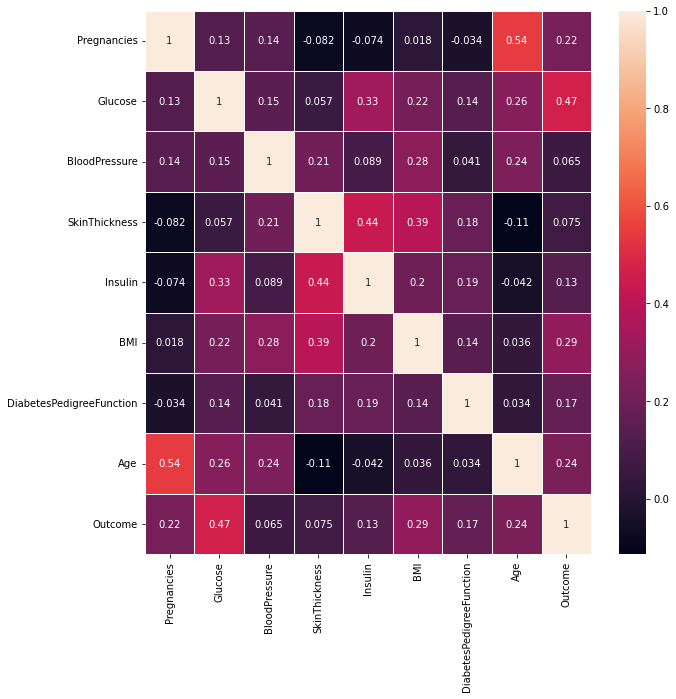

In [12]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

In [13]:
#Centering and Scaling Data
data['Age']=(data.Age-np.min(data.Age))/(np.max(data.Age)-np.min(data.Age))
data['DiabetesPedigreeFunction']=(data.DiabetesPedigreeFunction - np.min(data.DiabetesPedigreeFunction))/(np.max(data.DiabetesPedigreeFunction)-np.min(data.DiabetesPedigreeFunction))
data['BMI']=(data.BMI-np.min(data.BMI))/(np.max(data.BMI)-np.min(data.BMI))
data['BloodPressure']=(data.BloodPressure-np.min(data.BloodPressure))/(np.max(data.BloodPressure)-np.min(data.BloodPressure))
data['Glucose']=(data.Glucose-np.min(data.Glucose))/(np.max(data.Glucose)-np.min(data.Glucose))
data['Insulin']=(data.Insulin-np.min(data.Insulin))/(np.max(data.Insulin)-np.min(data.Insulin))
data['SkinThickness']=(data.SkinThickness-np.min(data.SkinThickness))/(np.max(data.SkinThickness)-np.min(data.SkinThickness))
data['Pregnancies']=(data.Pregnancies-np.min(data.Pregnancies))/(np.max(data.Pregnancies)-np.min(data.Pregnancies))

#Resampling 
#import imblearn 
#from imblearn.under_sampling import RandomUnderSampler

x = data.drop(['Outcome'], axis =1)
y = data.Outcome.values

#resample = RandomUnderSampler(random_state=42,replacement=True)
#x,y=resample.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

Test Accuracy: 0.7792207792207793


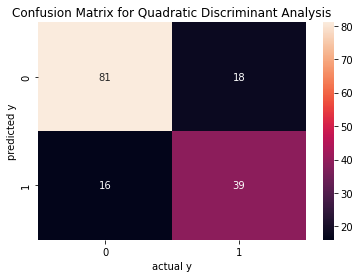

In [14]:
### Quadratic Discriminant Analysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)

y_predict_test = qda.predict(x_test)

#acc = accuracy_score(y_test, y_predict_test)
#cm = confusion_matrix(y_test,y_predict_test)

#print('Accuracy:',acc)
#print('Confusion Matrix:\n',cm)

test_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Quadratic Discriminant Analysis")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)

Test Accuracy: 0.7402597402597403


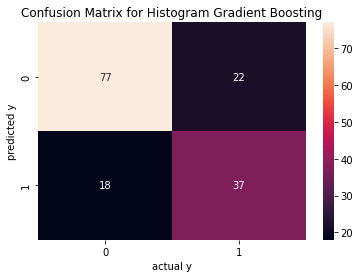

In [15]:
### Hist Gradient Boosting 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_predict_test = gbc.predict(x_test)

#acc = accuracy_score(y_test, y_predict_test)
#cm = confusion_matrix(y_test,y_predict_test)

#print('Accuracy:',acc)
#print('Confusion Matrix:\n',cm)

test_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Histogram Gradient Boosting")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)

Test Accuracy: 0.7402597402597403


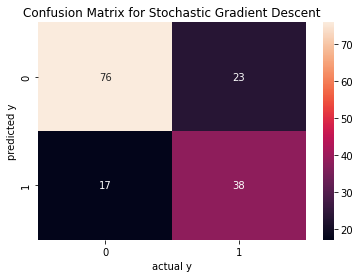

In [16]:
### Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

sgd=SGDClassifier()
sgd.fit(x_train,y_train)

y_predict_test = sgd.predict(x_test)

#acc = accuracy_score(y_test, y_predict_test)
#cm = confusion_matrix(y_test,y_predict_test)

#print('Accuracy:',acc)
#print('Confusion Matrix:\n',cm)
#
test_matrix = confusion_matrix(y_test, y_predict_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.title("Confusion Matrix for Stochastic Gradient Descent")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)